In [2]:
import pandas as pd
import numpy as np 
import seaborn as sn

#Reading Dataset in DF

bookings = pd.read_csv("booking.csv")

bookings.head(8)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled


In [3]:
#Converting Columns into factors
bookings['type of meal'] = bookings['type of meal'].astype(object)
bookings['room type'] = bookings['room type'].astype(object)
bookings['market segment type'] = bookings['market segment type'].astype(object)
bookings['booking status'] = bookings['booking status'].astype(object)
bookings['repeated'] = bookings['repeated'].astype(object)
bookings['car parking space'] = bookings['car parking space'].astype(object)

In [4]:
#Generating statistical description of dataset
bookings.describe(include = object)

,Booking_ID,type of meal,car parking space,room type,market segment type,repeated,date of reservation,booking status
count,36285,36285,36285,36285,36285,36285,36285,36285
unique,36285,4,2,7,5,2,553,2
top,INN00001,Meal Plan 1,0,Room_Type 1,Online,0,10/13/2018,Not_Canceled
freq,1,27842,35161,28138,23221,35355,254,24396


In [5]:
#converting 'date of reservation' column to date

#converting 'date of reservation' column to date
#Initializing column indicators for identifying different data formats for 'date of reservation' column

bookings['dateFormat'] = 0 #date format m/d/y
bookings.loc[bookings['date of reservation'].str.contains('-'), 'dateFormat'] = 1 #date format y-m-d

In [6]:
#Creating a new date of reservation column with uniform format
bookings['resDate'] = bookings['date of reservation']

#looking for date format 0, and formatting it as datetime
bookings.loc[bookings.dateFormat == 0, 'resDate'] = pd.to_datetime(
    bookings.loc[bookings.dateFormat == 0, 'date of reservation']
                                                    , format = '%m/%d/%Y').dt.strftime('%m/%d/%Y')

#looking for date format 1, and formatting it as datetime m/d/y
#coerce was enabled to convert invalid dates to NAN
bookings.loc[bookings.dateFormat == 1, 'resDate'] = pd.to_datetime(
    bookings.loc[bookings.dateFormat == 1, 'date of reservation'], 
                                                    format = '%Y-%m-%d',errors='coerce').dt.strftime('%m/%d/%Y')

In [7]:
#Analyzing invalid dates
bookings.loc[bookings.dateFormat == 1 ,['date of reservation','resDate']]

,date of reservation,resDate
2626,2018-2-29,NaN
3677,2018-2-29,NaN
5600,2018-2-29,NaN
6343,2018-2-29,NaN
7648,2018-2-29,NaN
8000,2018-2-29,NaN
8989,2018-2-29,NaN
9153,2018-2-29,NaN
9245,2018-2-29,NaN
9664,2018-2-29,NaN


In [8]:
#dropping invalid dates
bookings = bookings[bookings['resDate'].notna()]

In [9]:
#Checking for null values
bookings.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dateFormat                  0
resDate                     0
dtype: int64

In [10]:
#removing unique ID, date format, and date of reservation column
bookings.drop(columns=['Booking_ID','date of reservation','dateFormat'], axis=1, inplace=True)


<Figure size 3000x3000 with 0 Axes>

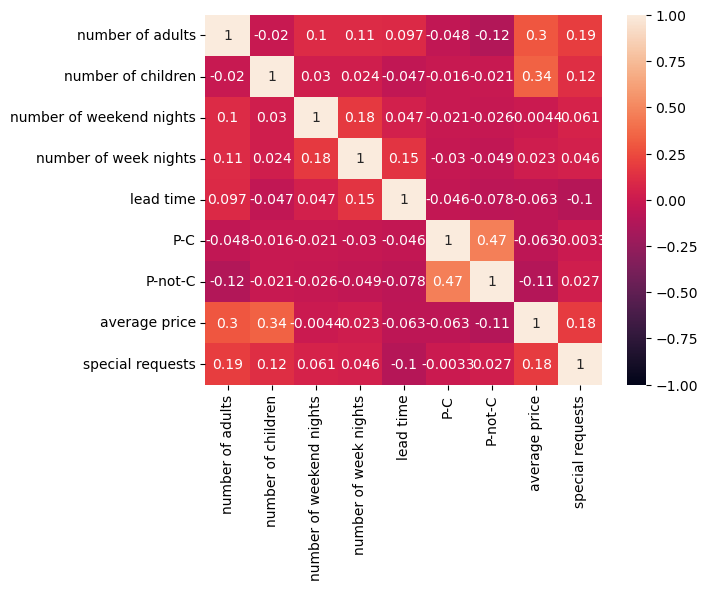

<Figure size 3000x3000 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

#Producing matrix to prepare heatmap for numerical attributes
bookMatDF = bookings.drop(bookings.columns[[4,5,6,8,9,14,15]], axis=1)
bookMat = bookMatDF.corr()
htMap = sn.heatmap(bookMat, annot=True, vmax=1,vmin=-1)
#htMap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.figure(figsize=(30, 30))

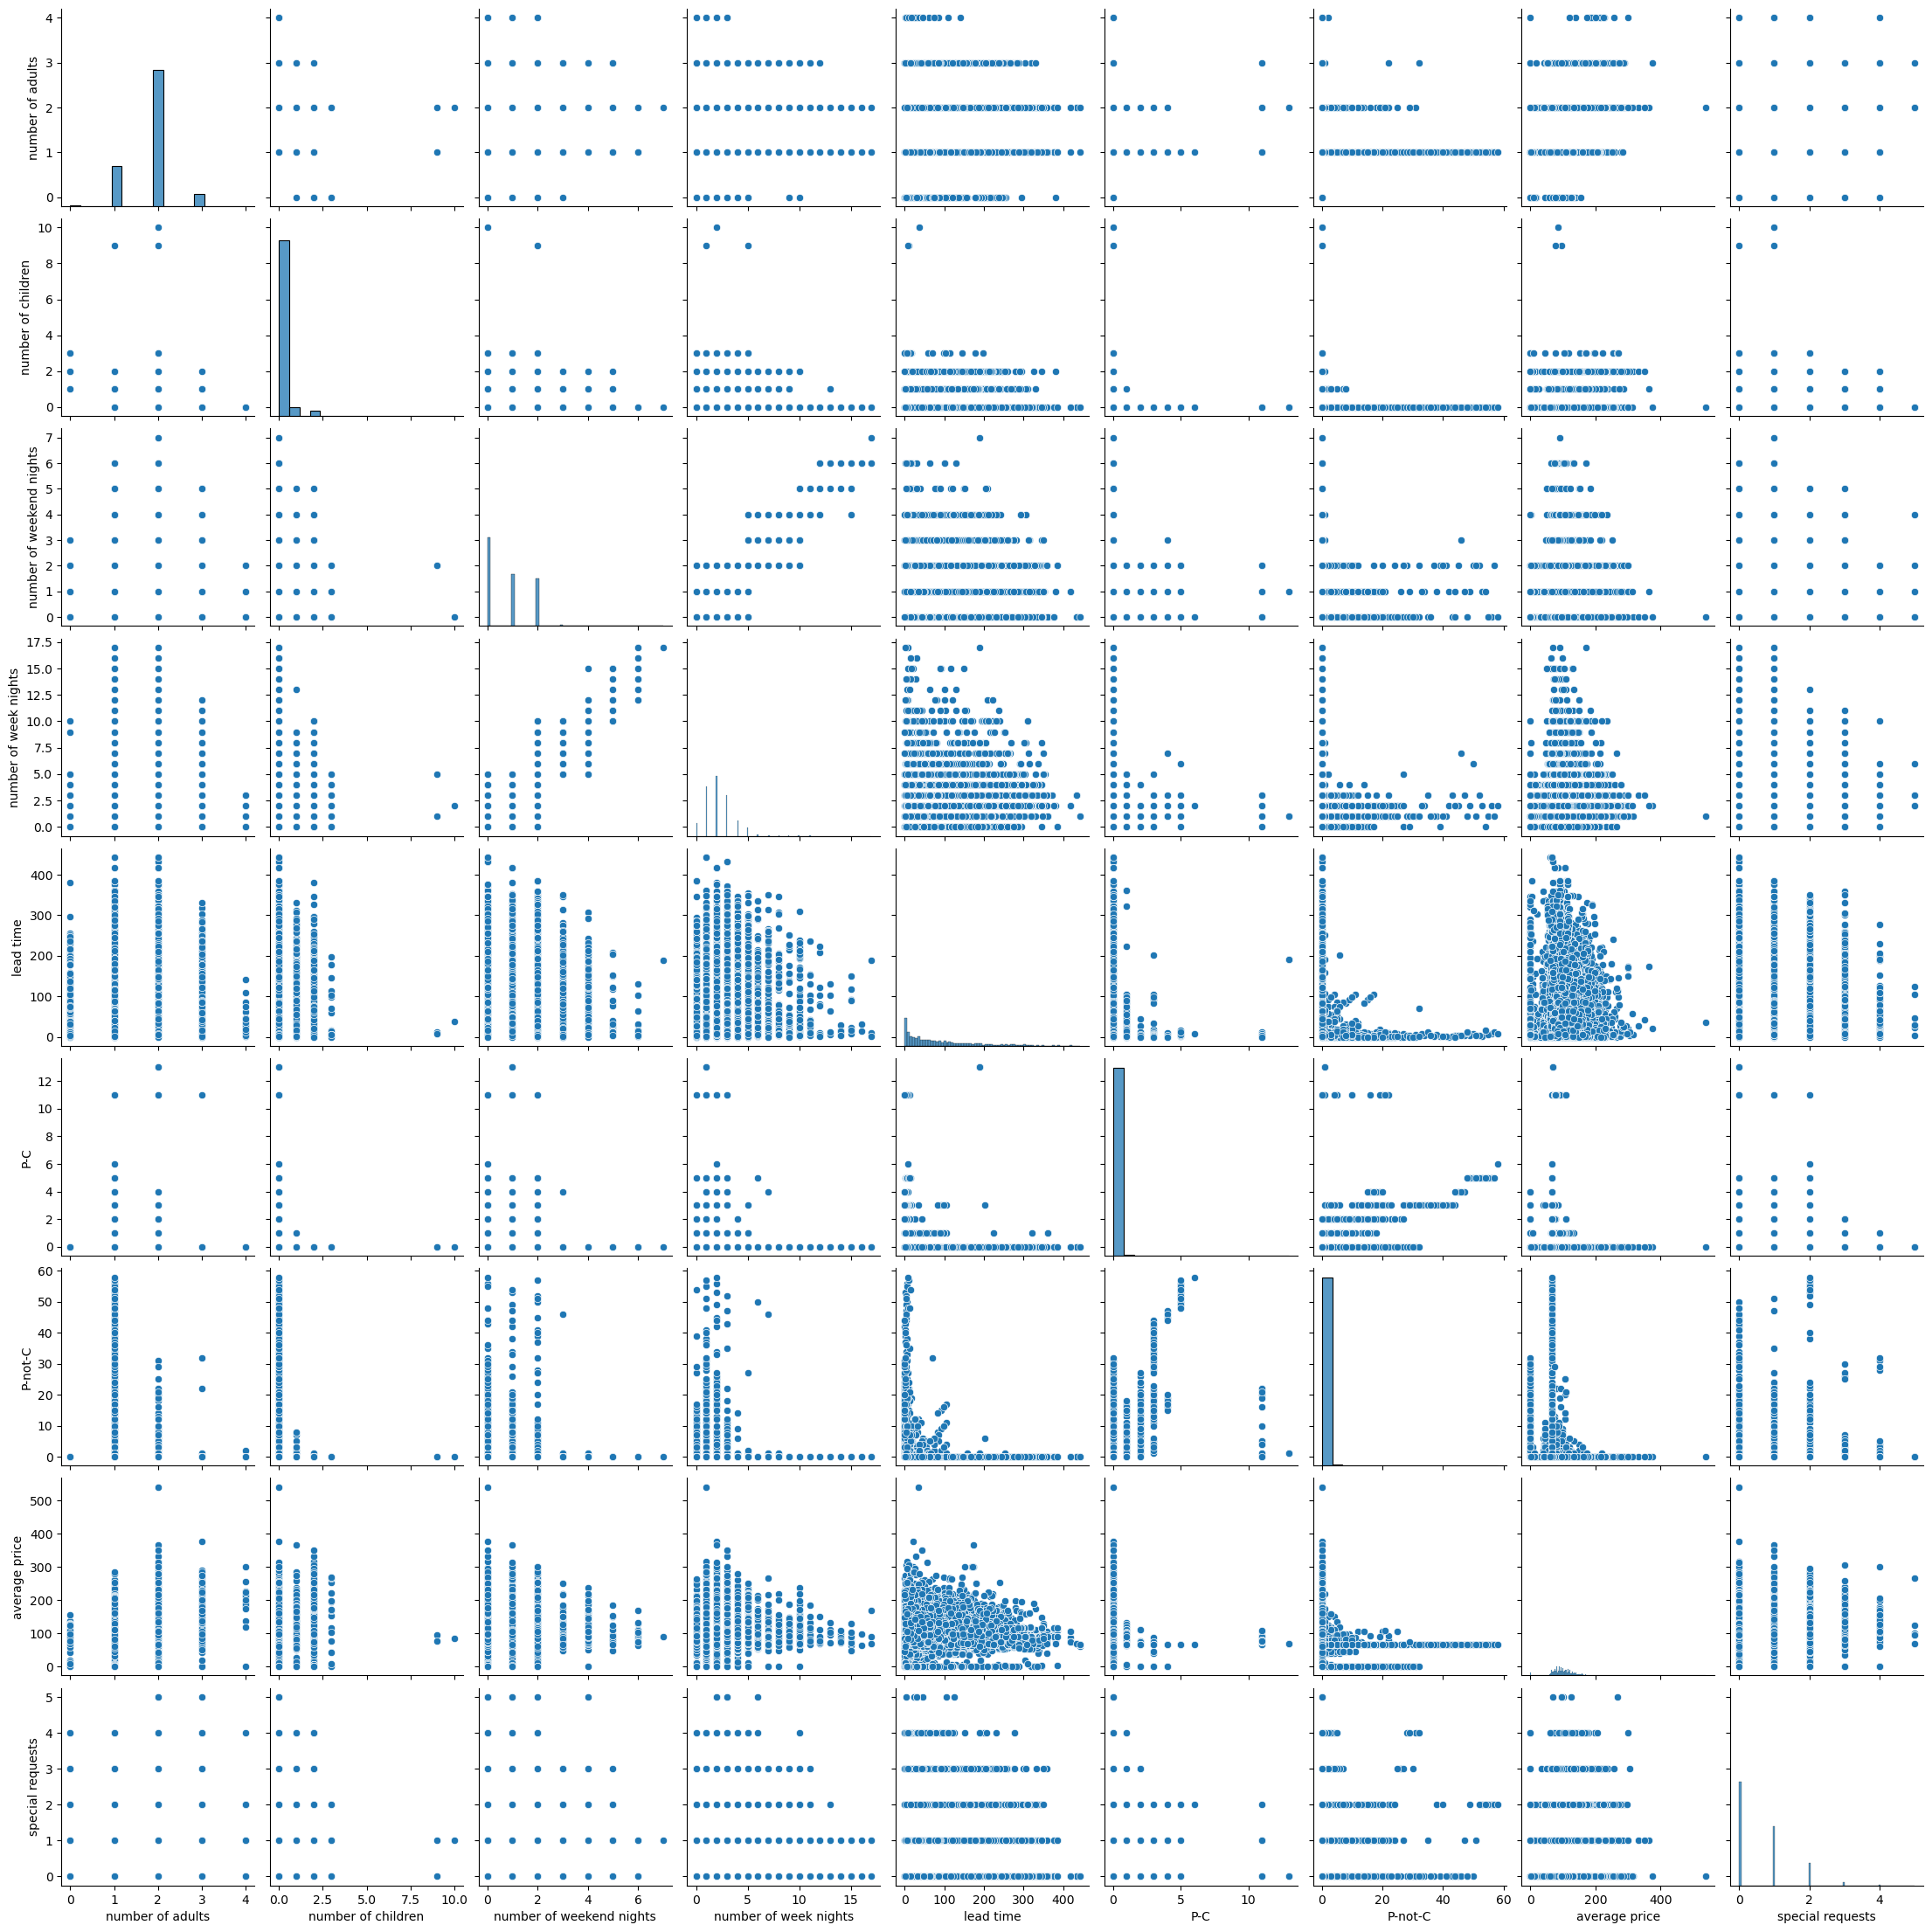

In [12]:
#Pair plot of data frame helping to see the different relationships between different attributes
#Also aiding in outloer detection
sn.pairplot(bookMatDF)

In [13]:
sn.__version__

'0.13.2'

<Axes: ylabel='lead time'>

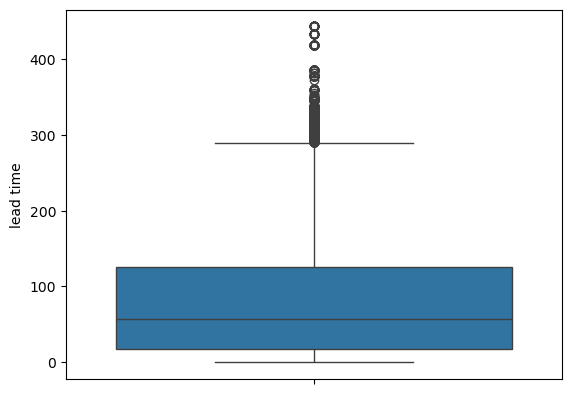

In [14]:

sn.boxplot(bookings['lead time'])


<Axes: ylabel='average price'>

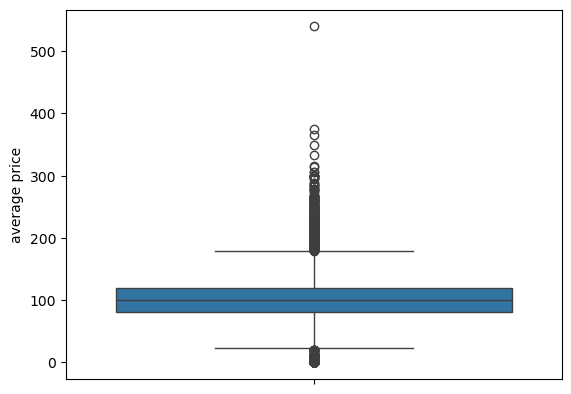

In [15]:
sn.boxplot(bookings['average price'])

In [16]:
from scipy import stats

#calculating z-score for attributes with potential outliers
z_price = np.abs(stats.zscore(bookings['average price']))
z_lead =  np.abs(stats.zscore(bookings['lead time']))
z_numWeek =  np.abs(stats.zscore(bookings['number of week nights']))
z_numWeekend =  np.abs(stats.zscore(bookings['number of weekend nights']))
z_numKids =  np.abs(stats.zscore(bookings['number of children']))

In [17]:
#adding zscore to dataframe
bookings['z price'] = z_price
bookings['z lead'] = z_lead
bookings['z numWeek'] = z_numWeek
bookings['z numWeekend']= z_numWeekend
bookings['z numKids'] = z_numKids

In [18]:
#Changing attribute type to category for categorical attributes
bookings['booking status'] = bookings['booking status'].astype('category')
bookings['type of meal'] = bookings['type of meal'].astype('category')
bookings['market segment type'] = bookings['market segment type'].astype('category')
bookings['room type'] = bookings['room type'].astype('category')

<Axes: ylabel='type of meal'>

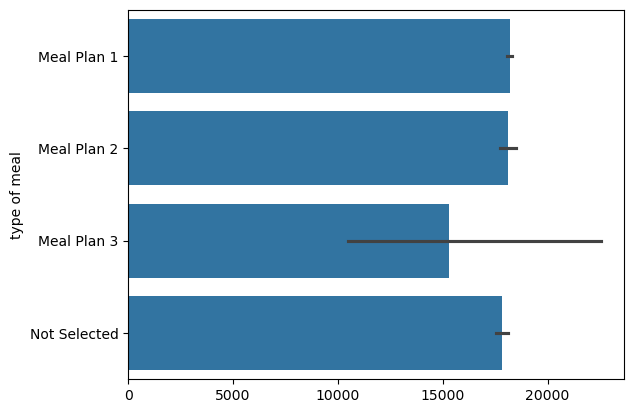

In [19]:
#boxplot
sn.barplot(bookings['type of meal'])

<Axes: ylabel='booking status'>

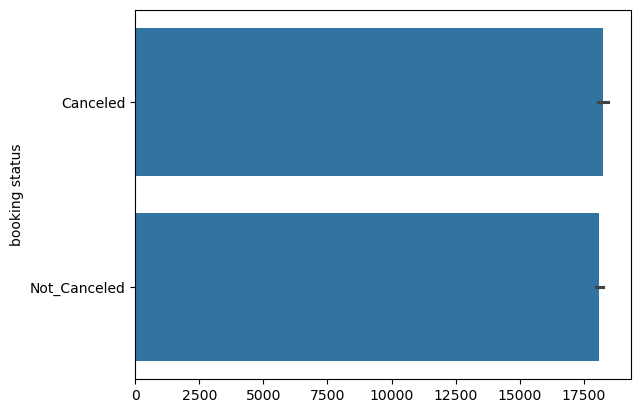

In [20]:
sn.barplot(bookings['booking status'])

In [21]:
z_limit = 2
bookings_clean = bookings

#finding index number of outliers in each column
outlier_price = np.where(z_price > z_limit)[0]
outlier_lead = np.where(z_lead > z_limit)[0]
outlier_numWeek = np.where(z_numWeek > z_limit)[0]
outlier_numWeekend = np.where(z_numWeekend > z_limit)[0]
outlier_numKids = np.where(z_numKids > z_limit)[0]

#combining index numbers of all attributes and storing unique indices in an array
outlier_index = np.unique(np.concatenate((outlier_price,outlier_lead,outlier_numWeek,outlier_numWeekend,outlier_numKids)))

In [22]:
#dropping indicies from clean data frame
bookings_clean = bookings_clean.drop(bookings_clean.index[outlier_index])

In [23]:
#dropping zscore columns from clean data frame
bookings_clean = bookings_clean.drop(bookings_clean.columns[15:21], axis = 1)

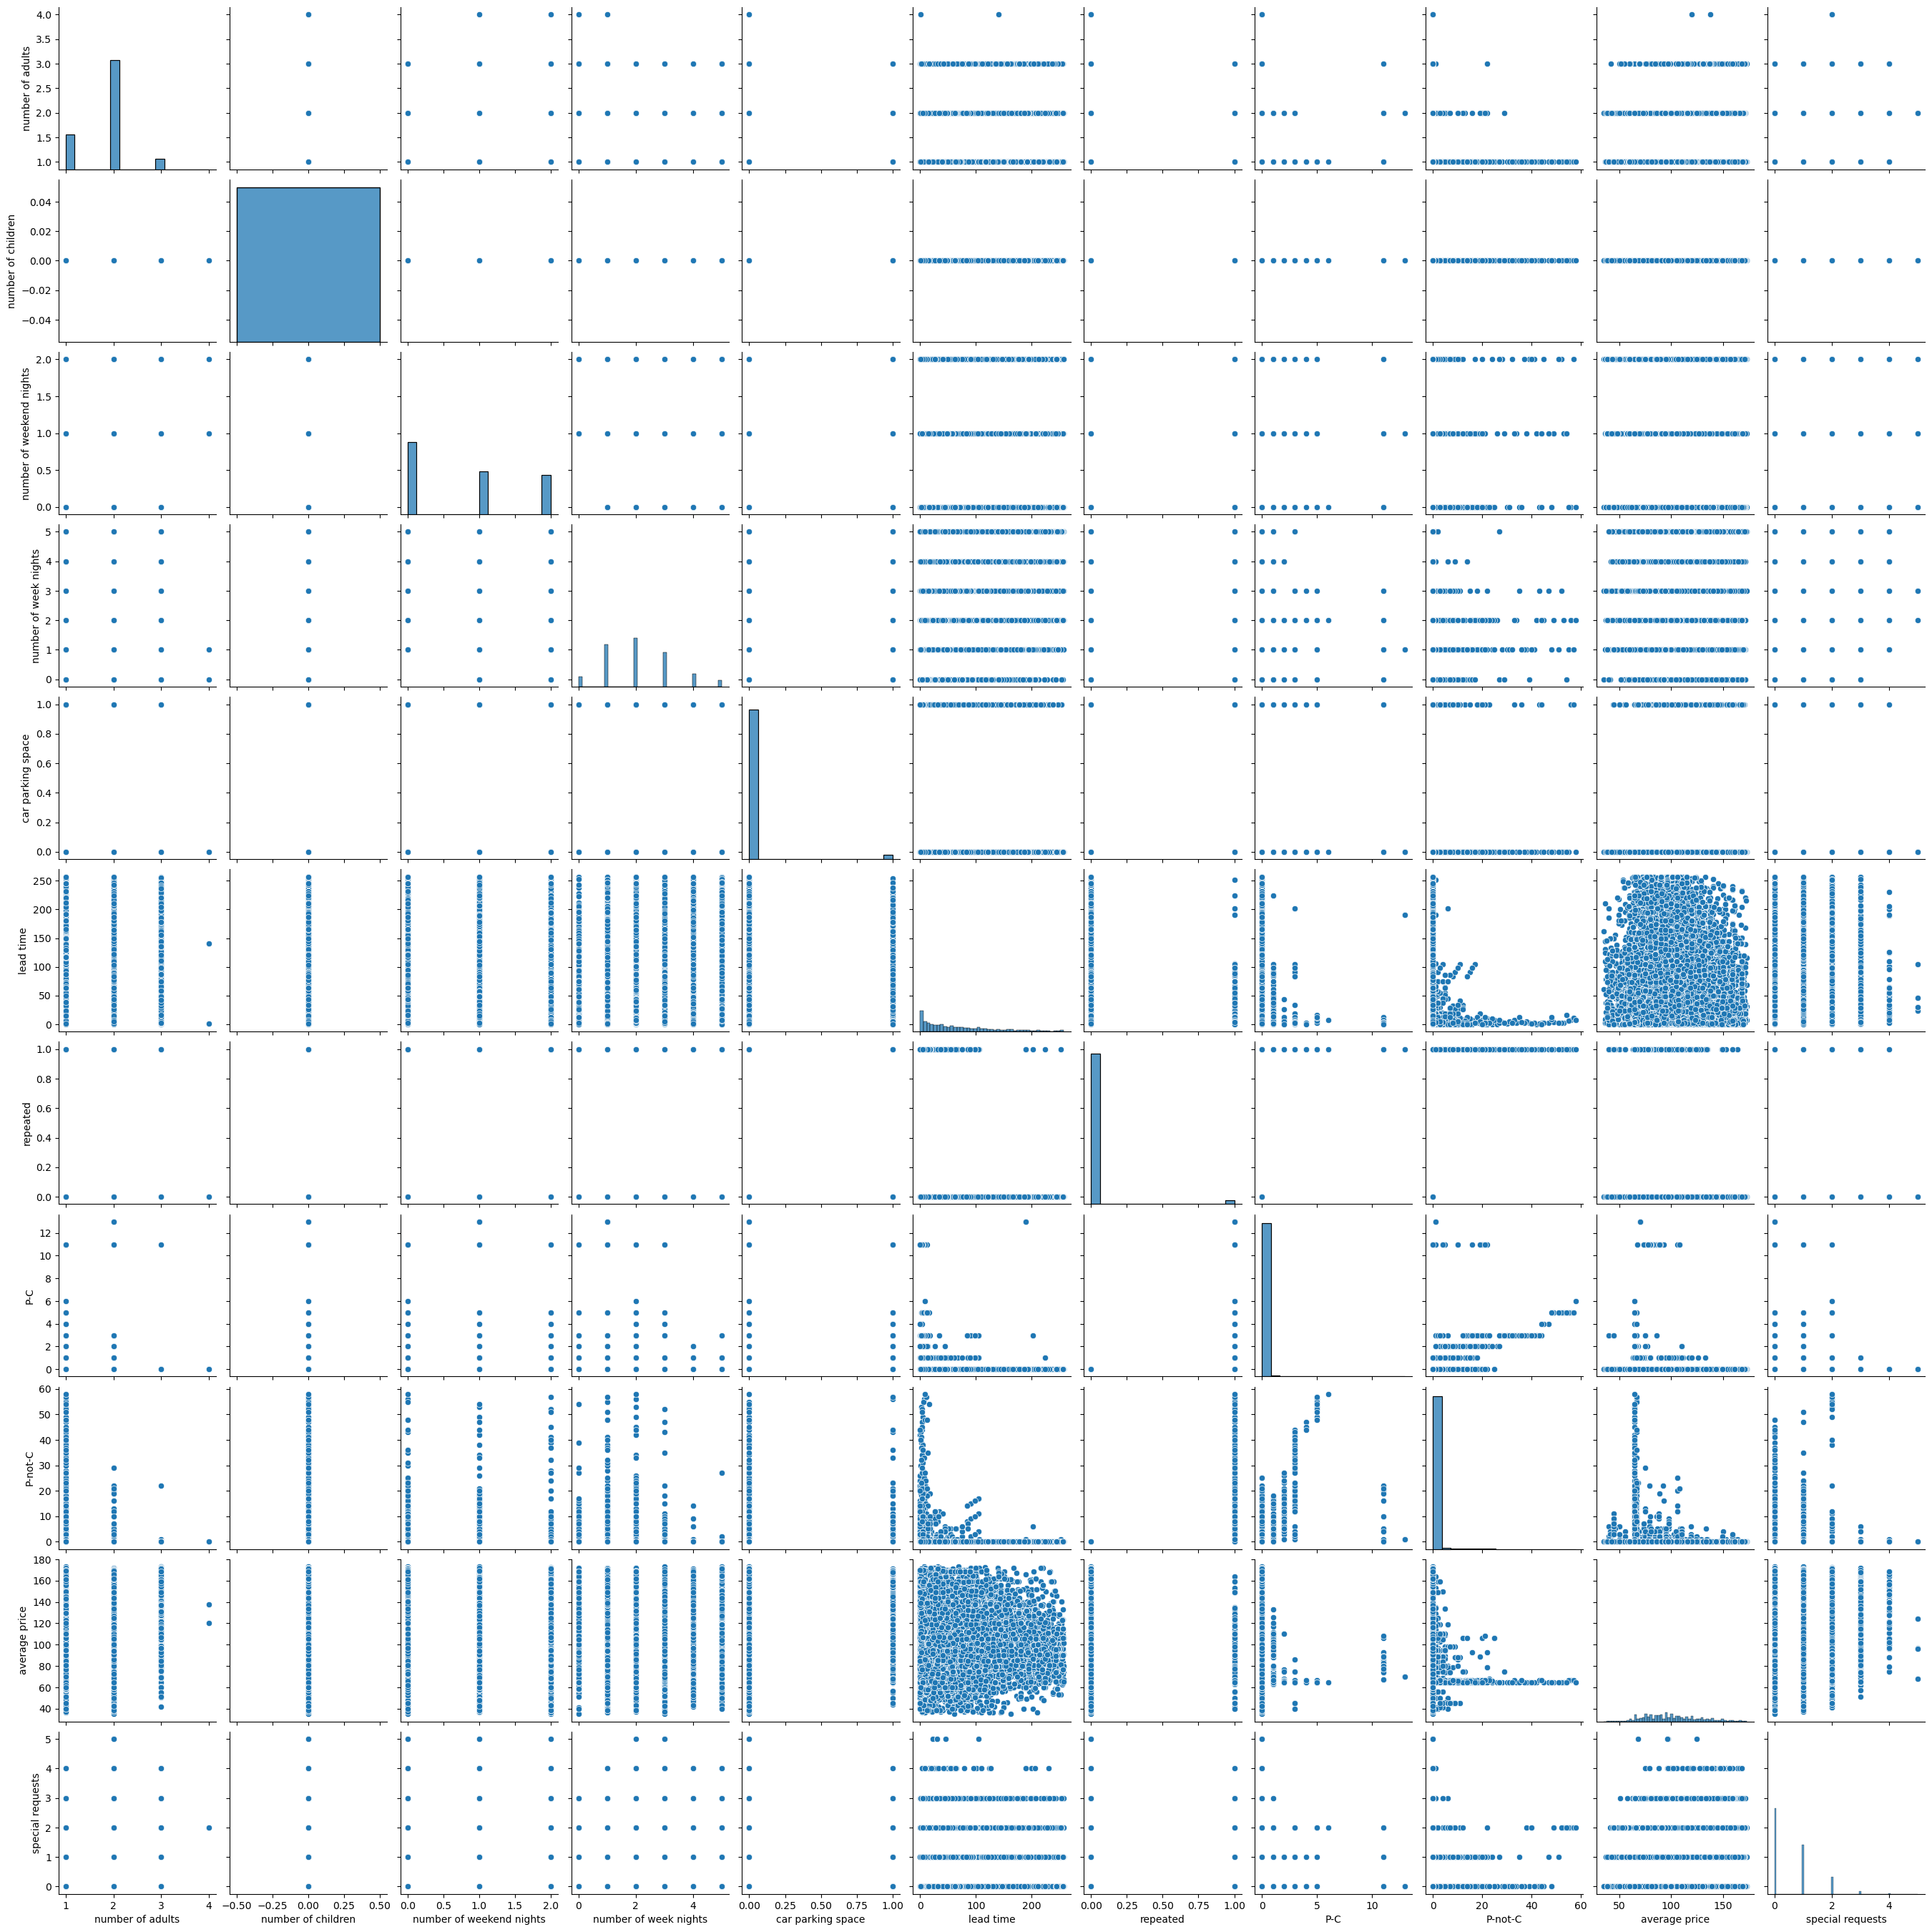

In [24]:
#creatign a pairplot for clean dataframe
sn.pairplot(bookings_clean)